# Projeto Data Science

###### Richardson Moraes 172989

Dataset utilizado: https://www.kaggle.com/datasets/justinas/nba-players-data

Neste dataset escolhido contém mais de duas décadas de dados de cada jogador que fez parte do elenco de uma equipe da NBA. 
Possui variáveis como Idade, Peso, Altura, de cada jogador, assim como as suas estatísticas como, Pontos, Assistências, Rebotes, além de estatísticas avançadas e informações como cidade de nascimento, Universidade que o jogador frequentou, Rodada e Posição onde foi escolhido no Draft.

Foi necessário realizar uma transformação no Dataset antes de começarmos nossas análises. Tratamos a variável de Temporada(Season) que estava no padrão 2022-23, para o padrão 01/01/2022, onde posteriormente é utilizado apenas o ano da data, para analisarmos as informações por temporada.

Começamos mostrando as informações presentes no dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
data = pd.read_csv("/content/drive/MyDrive/all_seasons.csv")

# Visualizar as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(data.head())


   Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

Agora utilizando a informação Country, ou seja o país de onde o jogador nasceu, avaliamos a evolução da quantidade de jogadores existentes na liga norte americana.

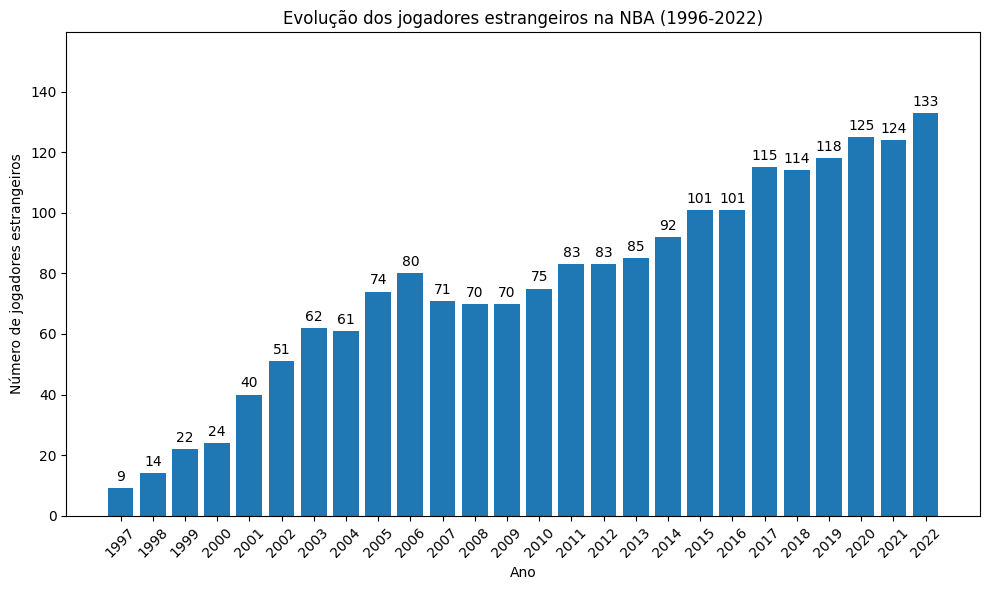

In [174]:

# Filtrar os jogadores estrangeiros (país diferente de USA)
foreign_players = data[data['country'] != 'USA']

# Contar o número de jogadores estrangeiros por ano
foreign_players_count = foreign_players.groupby(data['season'].dt.year)['player_name'].count()

# Plotar o gráfico de barras para os jogadores estrangeiros
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para o número de jogadores estrangeiros por ano
bars = ax.bar(foreign_players_count.index, foreign_players_count.values)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de jogadores estrangeiros')
ax.set_title('Evolução dos jogadores estrangeiros na NBA (1996-2022)')
ax.set_xticks(foreign_players_count.index)
ax.set_xticklabels(foreign_players_count.index, rotation=45)


# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    ax.annotate(yval, xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.ylim(top=foreign_players_count.values.max() * 1.2)

plt.tight_layout()
plt.show()


Agora utilizando de regressão linear busca-se encontrar a relação entre altura e pontuação média

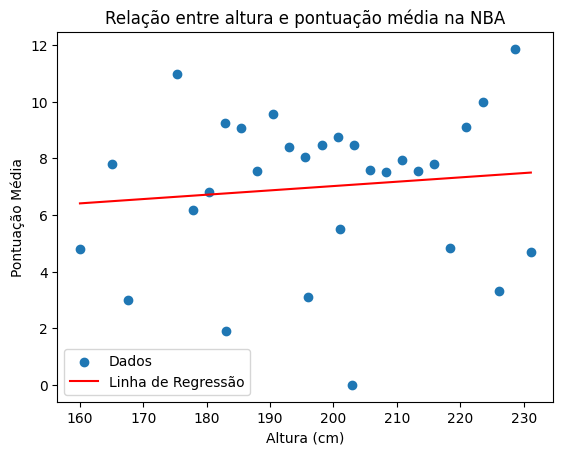

In [37]:
import numpy as np
from scipy.stats import linregress


# Calcular a pontuação média por altura
average_points_by_height = data.groupby('player_height')['pts'].mean().reset_index()

# Calcular a linha de regressão linear
slope, intercept, r_value, p_value, std_err = linregress(average_points_by_height['player_height'], average_points_by_height['pts'])
line = slope * average_points_by_height['player_height'] + intercept

# Plotar o gráfico de dispersão com a linha de regressão linear
plt.scatter(average_points_by_height['player_height'], average_points_by_height['pts'], label='Dados')
plt.plot(average_points_by_height['player_height'], line, color='red', label='Linha de Regressão')
plt.xlabel('Altura (cm)')
plt.ylabel('Pontuação Média')
plt.title('Relação entre altura e pontuação média na NBA')
plt.legend()
plt.show()

O próximo gráfico analisa as médias de cada jogador por temporada, e apresenta os 10 jogadores com as maiores médias.

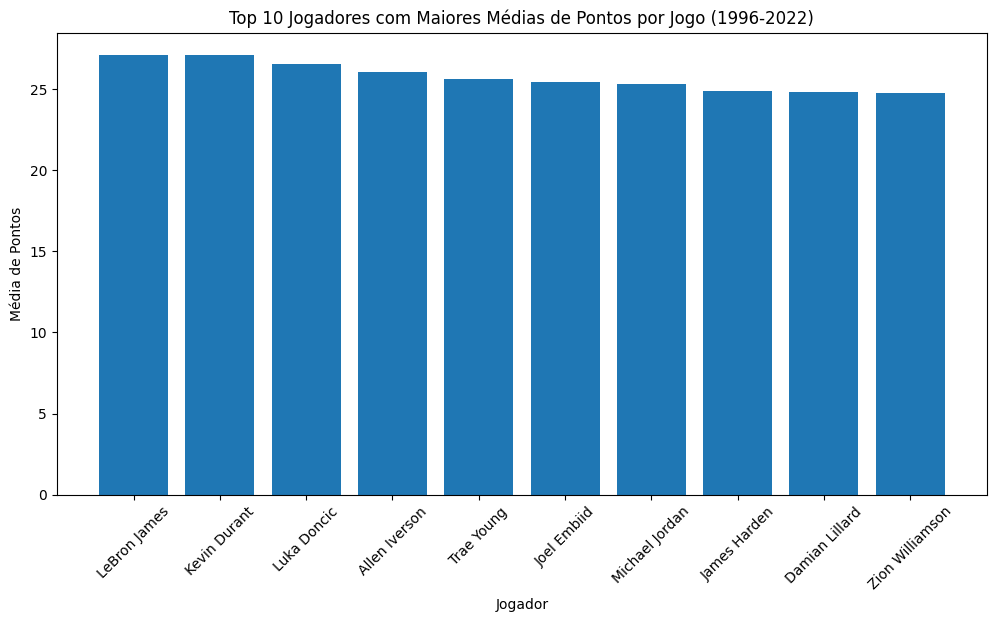

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
  
# Calcular a média das estatísticas para todos os jogadores
average_stats = data.groupby('player_name')[['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']].mean().reset_index()

# Ordenar o DataFrame pelas médias de pontos em ordem decrescente
top_10_pts = average_stats.nlargest(10, 'pts')

# Plotar o gráfico de barras para os 10 jogadores com mais médias de pontos
plt.figure(figsize=(12, 6))
x = top_10_pts['player_name']
y = top_10_pts['pts']
plt.bar(x, y)
plt.xlabel('Jogador')
plt.ylabel('Média de Pontos')
plt.title('Top 10 Jogadores com Maiores Médias de Pontos por Jogo (1996-2022)')
plt.xticks(rotation=45)
plt.show()


Abaixo temos o gráfico de desempenho de cada jogador, a métrica que usamos é PTS + REB + AST, no acumulado temos os 10 jogadores abaixo.

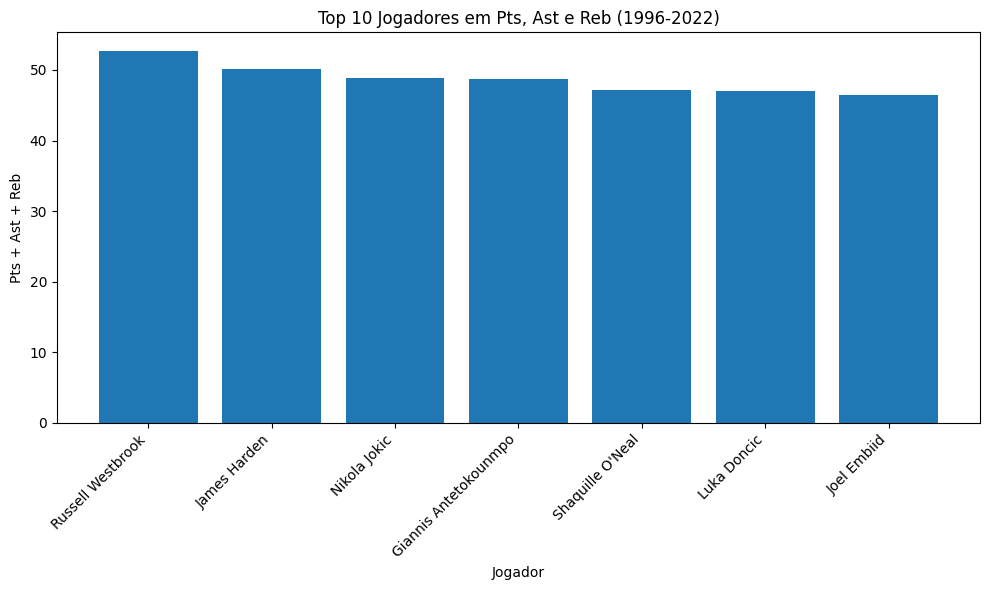

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a medida de desempenho dos jogadores
data['player_performance'] = (data['pts'] + data['ast'] + data['reb'])

# Filtrar os jogadores com informações de draft
drafted_players = data.dropna(subset=['draft_number'])

# Selecionar os 10 melhores jogadores historicamente
top_players = drafted_players.sort_values(by='player_performance', ascending=False).head(10)

# Plotar o gráfico de barras para os 10 melhores jogadores
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a medida de desempenho dos 10 melhores jogadores
ax.bar(top_players['player_name'], top_players['player_performance'])
ax.set_xlabel('Jogador')
ax.set_ylabel('Pts + Ast + Reb')
ax.set_title('Top 10 Jogadores em Pts, Ast e Reb (1996-2022)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Semelhante ao gráfico de cima porém utilizamos uma variável de regularidade, que é a quantidade de partidas por temporada, para conhecermos aqueles jogadores que conseguem desempenhar bem por mais tempo na temporada.

O conjunto de dados foi filtrado por GP(Games Played) > 64, já que a liga tem utilizado o número mínimo de 65 partidas na temporada para um jogador poder disputar a um prêmio individual. Uma temporada possui 82 jogos por equipe.

<ipython-input-182-990649a421f6>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



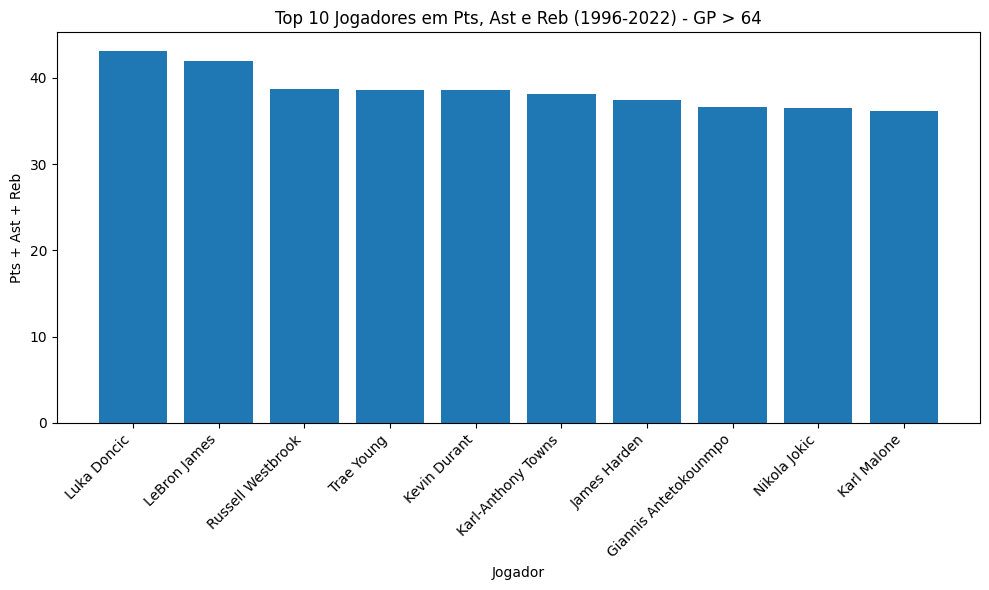

In [182]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular a medida de desempenho dos jogadores
data['player_performance'] = data['pts'] + data['ast'] + data['reb']

# Filtrar os jogadores com média de jogos por temporada acima de 64 partidas
filtered_players = data.groupby('player_name').filter(lambda x: x['gp'].mean() > 64)

# Filtrar os jogadores com informações de draft
drafted_players = filtered_players.dropna(subset=['draft_number'])

# Selecionar os 10 melhores jogadores historicamente
top_players = drafted_players.groupby('player_name').mean().nlargest(10, 'player_performance').reset_index()

# Plotar o gráfico de barras para os 10 melhores jogadores
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a medida de desempenho dos 10 melhores jogadores
ax.bar(top_players['player_name'], top_players['player_performance'])
ax.set_xlabel('Jogador')
ax.set_ylabel('Pts + Ast + Reb')
ax.set_title('Top 10 Jogadores em Pts, Ast e Reb (1996-2022) - GP > 64')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Abaixo temos uma visualização semelhante, porém agora filtrando pelos últimos 4 anos (2018-2022)

<ipython-input-194-6718b879e667>:8: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()

<ipython-input-194-6718b879e667>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-194-6718b879e667>:23: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



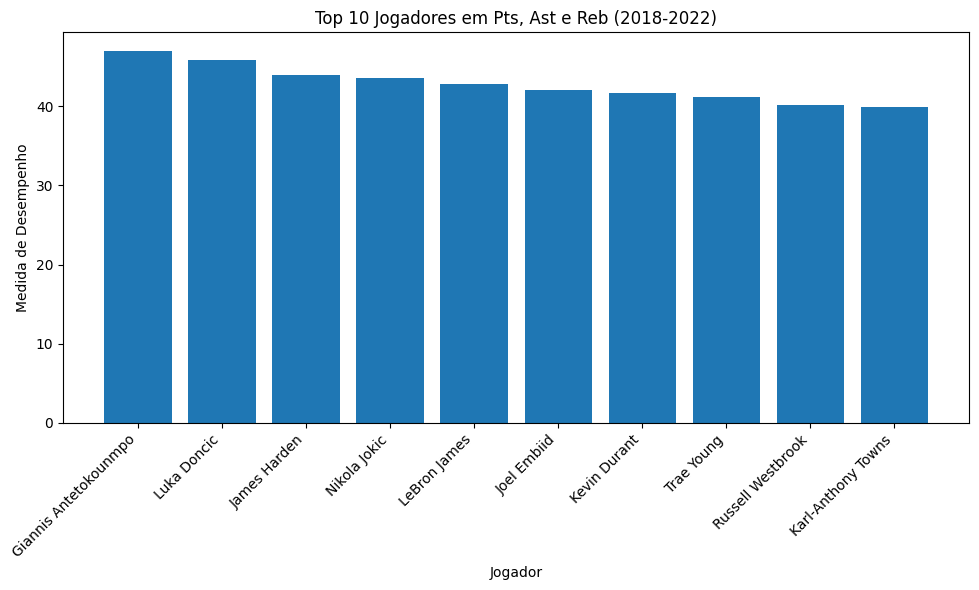

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'season' em formato de data
data['season'] = pd.to_datetime(data['season'])

# Definir a data limite dos últimos 4 anos
data_limite = pd.to_datetime('now') - pd.DateOffset(years=4)

# Filtrar os registros pelos últimos 4 anos
last_4_years = data[data['season'] >= data_limite]

# Calcular a medida de desempenho dos jogadores
last_4_years['player_performance'] = last_4_years['pts'] + last_4_years['ast'] + last_4_years['reb']

# Filtrar os jogadores com média de jogos por temporada acima de 64 partidas
filtered_players = last_4_years.groupby('player_name').filter(lambda x: x['gp'].mean() > 0)

# Filtrar os jogadores com informações de draft
drafted_players = filtered_players.dropna(subset=['draft_number'])

# Selecionar os 10 melhores jogadores historicamente
top_players = drafted_players.groupby('player_name').mean().nlargest(10, 'player_performance').reset_index()

# Plotar o gráfico de barras para os 10 melhores jogadores
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a medida de desempenho dos 10 melhores jogadores
ax.bar(top_players['player_name'], top_players['player_performance'])
ax.set_xlabel('Jogador')
ax.set_ylabel('Medida de Desempenho')
ax.set_title('Top 10 Jogadores em Pts, Ast e Reb (2018-2022)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Agora usamos a métrica de regularidade que são GP > 64, além da de tempo que são os últimos 4 anos.

<ipython-input-183-73ea96a3251a>:8: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()

<ipython-input-183-73ea96a3251a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-73ea96a3251a>:23: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



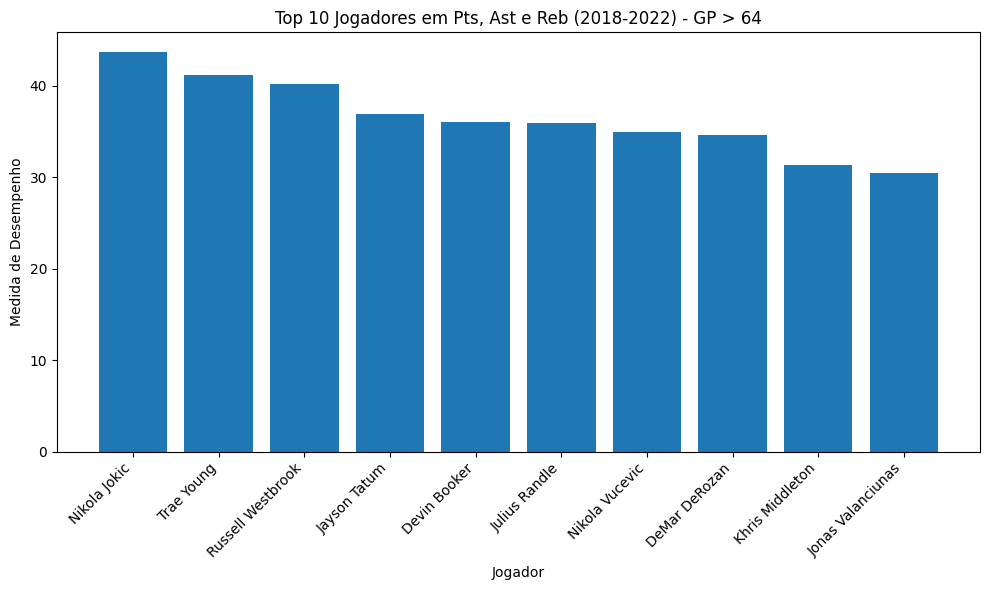

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'season' em formato de data
data['season'] = pd.to_datetime(data['season'])

# Definir a data limite dos últimos 4 anos
data_limite = pd.to_datetime('now') - pd.DateOffset(years=4)

# Filtrar os registros pelos últimos 4 anos
last_4_years = data[data['season'] >= data_limite]

# Calcular a medida de desempenho dos jogadores
last_4_years['player_performance'] = last_4_years['pts'] + last_4_years['ast'] + last_4_years['reb']

# Filtrar os jogadores com média de jogos por temporada acima de 64 partidas
filtered_players = last_4_years.groupby('player_name').filter(lambda x: x['gp'].mean() > 64)

# Filtrar os jogadores com informações de draft
drafted_players = filtered_players.dropna(subset=['draft_number'])

# Selecionar os 10 melhores jogadores historicamente
top_players = drafted_players.groupby('player_name').mean().nlargest(10, 'player_performance').reset_index()

# Plotar o gráfico de barras para os 10 melhores jogadores
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a medida de desempenho dos 10 melhores jogadores
ax.bar(top_players['player_name'], top_players['player_performance'])
ax.set_xlabel('Jogador')
ax.set_ylabel('Medida de Desempenho')
ax.set_title('Top 10 Jogadores em Pts, Ast e Reb (2018-2022) - GP > 64')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Uma das estatísticas avançadas que o dataset possui é a de TS%(True Shooting Percentage) que cálcula a porcentagem de arremessos convertidos considerando apenas de 3 pontos e lances livres. É considerada uma boa métrica para avaliar o arremesso dos jogadores.

Abaixo temos a evolução ao longo dos anos dessa estatística, levando em consideração todos os jogadores.

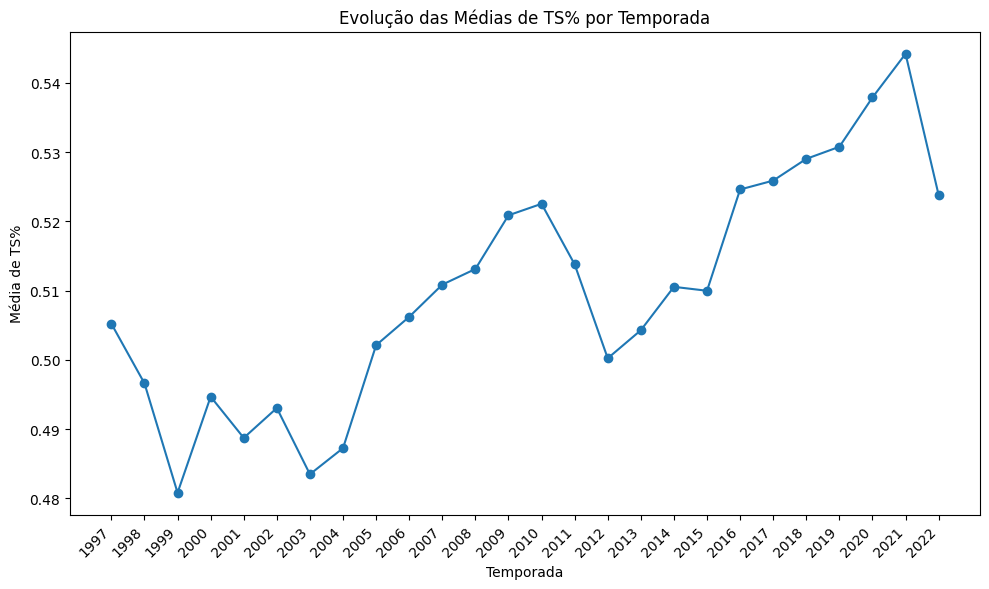

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'season' para o tipo datetime
data['season'] = pd.to_datetime(data['season'])

# Calcular a média de TS% por temporada
average_ts_pct = data.groupby(data['season'].dt.year)['ts_pct'].mean().reset_index()

# Configurar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico de linha para a evolução das médias de TS% por temporada
ax.plot(average_ts_pct['season'], average_ts_pct['ts_pct'], marker='o')
ax.set_xlabel('Temporada')
ax.set_ylabel('Média de TS%')
ax.set_title('Evolução das Médias de TS% por Temporada')

# Ajustar os intervalos dos ticks e labels do eixo x
ax.set_xticks(average_ts_pct['season'])
ax.set_xticklabels(average_ts_pct['season'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


Abaixo, buscamos encontrar uma relação entre a altura do jogador e a quantidade de rebotes.

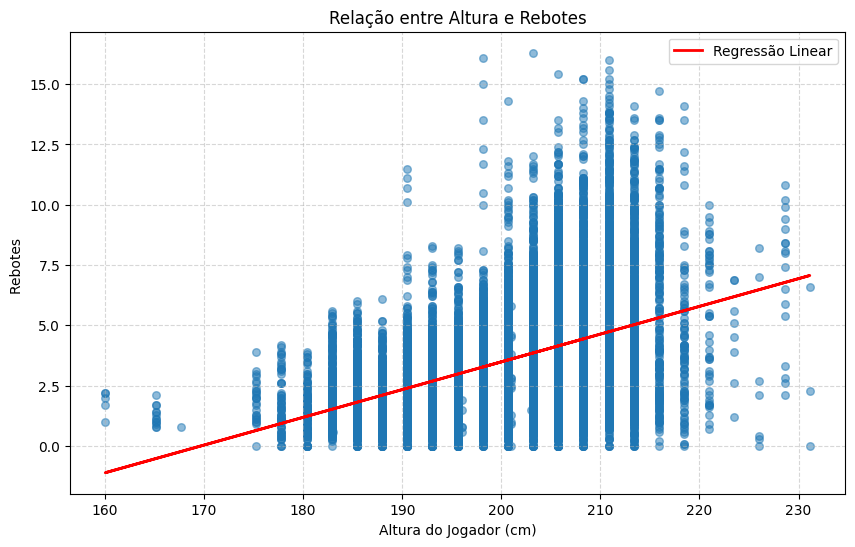

In [109]:
import pandas as pd
import matplotlib.pyplot as plt


# Selecionar as colunas de interesse
df = data[['player_height', 'reb']]

# Remover linhas com valores ausentes
df = df.dropna()

# Definir tamanho e cor dos pontos no gráfico
point_size = 30
point_color = '#1f77b4'  # Azul

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['player_height'], df['reb'], s=point_size, c=point_color, alpha=0.5)
plt.xlabel('Altura do Jogador (cm)')
plt.ylabel('Rebotes ')
plt.title('Relação entre Altura e Rebotes')

# Adicionar linha de regressão linear
regression_line = np.polyfit(df['player_height'], df['reb'], 1)
plt.plot(df['player_height'], np.polyval(regression_line, df['player_height']), color='red', linewidth=2, label='Regressão Linear')

# Adicionar legenda
plt.legend()

# Personalizar a grade do gráfico
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Relacão entre Pontos e Assistências.

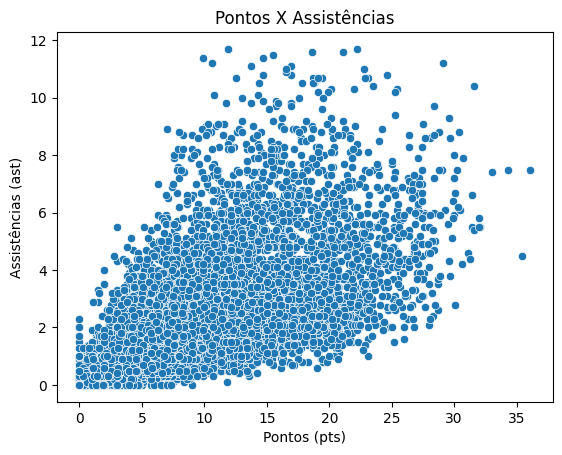

In [156]:
sns.scatterplot(x='pts', y='ast', data=data)
plt.xlabel('Pontos (pts)')
plt.ylabel('Assistências (ast)')
plt.title('Pontos X Assistências')
plt.show()

Buscamos encontrar uma relação entre Pontos e TS%.

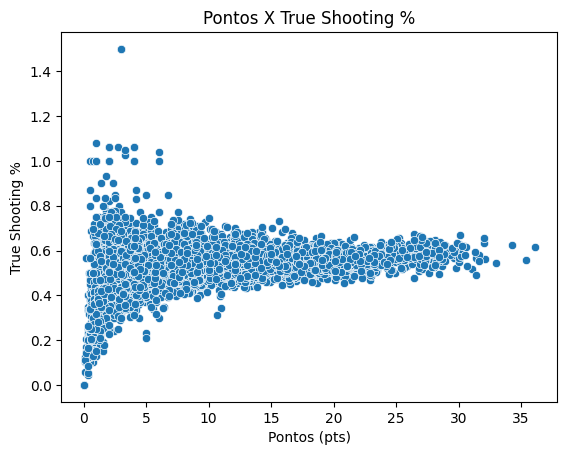

In [157]:
sns.scatterplot(x='pts', y='ts_pct', data=data)
plt.xlabel('Pontos (pts)')
plt.ylabel('True Shooting %')
plt.title('Pontos X True Shooting %')
plt.show()


A maioria dos jogadores da NBA entra na liga por meio do Draft anual, vindo diretamente de um College, abaixo listamos os Colleges que mais forneceram jogadores a NBA.

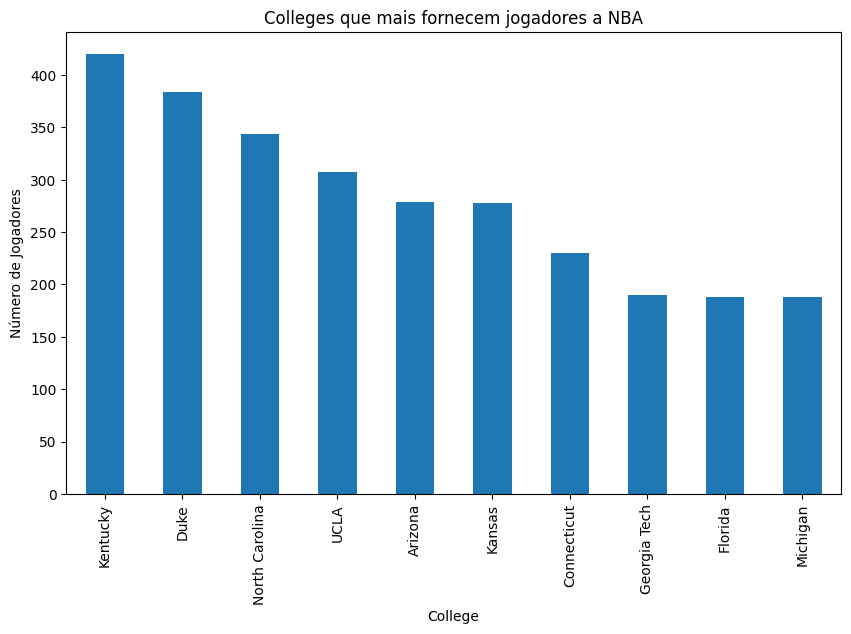

In [153]:
import matplotlib.pyplot as plt

filtered_data = data[data['college'] != 'None']

# Contar o número de jogadores por college
top_colleges = filtered_data['college'].value_counts().head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_colleges.plot(kind='bar')

# Configurar os rótulos e o título do gráfico
plt.xlabel('College')
plt.ylabel('Número de Jogadores')
plt.title('Colleges que mais fornecem jogadores a NBA')

# Exibir o gráfico
plt.show()


Utilizando das colunas Peso e Altura, abaixo analisamos a média de peso e altura dos jogadores pelo período de tempo disponível.

<ipython-input-152-98d0bc5824a2>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



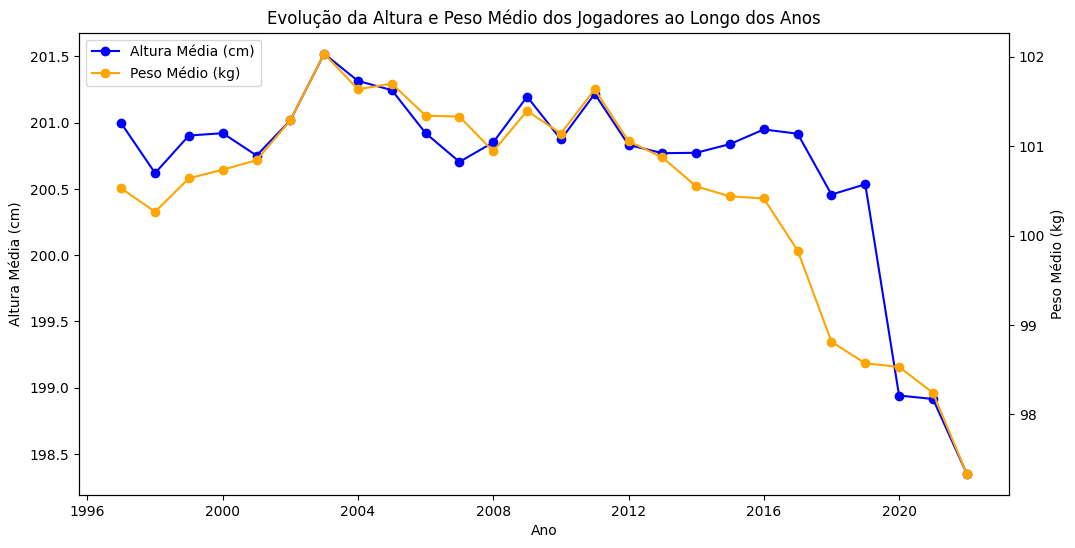

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar os dados por ano e calcular a média da altura e peso
average_height_weight = data.groupby('season')['player_height', 'player_weight'].mean()

# Criar o gráfico de linhas
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar a linha para a altura média
ax1.plot(average_height_weight.index, average_height_weight['player_height'], color='blue', marker='o', label='Altura Média (cm)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Altura Média (cm)')
ax1.tick_params('y')

# Adicionar um segundo eixo y para o peso médio
ax2 = ax1.twinx()
ax2.plot(average_height_weight.index, average_height_weight['player_weight'], color='orange', marker='o', label='Peso Médio (kg)')
ax2.set_ylabel('Peso Médio (kg)')
ax2.tick_params('y')

# Configurar os rótulos e o título do gráfico
plt.title('Evolução da Altura e Peso Médio dos Jogadores ao Longo dos Anos')

# Configurar o eixo x com intervalo de 1 ano
# plt.xticks(average_height_weight.index, rotation=45)


# Adicionar legenda de cores
lines = [ax1.lines[0], ax2.lines[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Exibir o gráfico
plt.show()
